**DATA PROCESSING**

In [46]:
#all libraries
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn import model_selection
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from collections import Counter
from sklearn.metrics import confusion_matrix
import sklearn.datasets as datasets
from sklearn.metrics import classification_report as report
from sklearn.datasets import make_classification
from numpy import argmax
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV


In [47]:
#readings data and labelling colums
cnames=["Chemical_formula","A","B","In_literature","Valence_A","Valence_B","Radius_A_angs","Radius_B_angs","Lowest_distortion","Formation_energy_eVperatom","Stability_eV_per_atom","Magnetic_moment_mu_B","Volume_per_atom_A_cube_per_atom","Band_gap_eV","a_angs","b_angs","c_angs","alpha_deg","beta_deg","gamma_deg","Vacancy_energy_eV_per_O_atom"]

df = pd.read_csv("data.csv",names=cnames)

In [36]:
#removing faulty data and replacing strings with a esier convetion
df.drop(df.index[(df["Valence_B"] == "5")],axis=0,inplace=True)
df.drop(df.index[(df["Valence_A"] == "5")],axis=0,inplace=True)
df.drop(df.index[(df["Valence_B"] == "4")],axis=0,inplace=True)
df.drop(df.index[(df["Valence_A"] == "4")],axis=0,inplace=True)
df.drop(df.index[(df["Valence_A"] == "element not in BV")],axis=0,inplace=True)
df.drop(df.index[(df["Valence_B"] == "element not in BV")],axis=0,inplace=True)
df.drop(df.index[(df["Vacancy_energy_eV_per_O_atom"] =="-")],axis=0,inplace=True)
df['Valence_A'] = df['Valence_A'].replace(['not balanced'], '0') 
df['Valence_A'] = df['Valence_A'].replace(['3'], '1') 
df['Valence_B'] = df['Valence_B'].replace(['not balanced'], '0') 
df['Valence_B'] = df['Valence_B'].replace(['3'], '1') 
df['Lowest_distortion'] = df['Lowest_distortion'].replace(['cubic'], '0') 
df['Lowest_distortion'] = df['Lowest_distortion'].replace(['orthorhombic'], '1')
df['Lowest_distortion'] = df['Lowest_distortion'].replace(['rhombohedral'], '2')
df['Lowest_distortion'] = df['Lowest_distortion'].replace(['tetragonal'], '3')
df['Magnetic_moment_mu_B'] = df['Magnetic_moment_mu_B'].replace(['-'], '0.00')
df['Vacancy_energy_eV_per_O_atom'] = df['Vacancy_energy_eV_per_O_atom'].replace(['-'], '0.00')
df['In_literature'] = df['In_literature'].replace(["FALSE"], '0') 
df['In_literature'] = df['In_literature'].replace(["TRUE"], '1')

In [4]:
df[1:]#printing data

,Chemical_formula,A,B,In_literature,Valence_A,Valence_B,Radius_A,Radius_B,Lowest_distortion,Formation_energy,...,Magnetic_moment,Volume_per_atom,Band_gap,a,b,c,alpha,beta,gamma,Vacancy_energy
75,Ag2O3,Ag,Ag,0,0,0,1.28,0.95,0,0.351,...,0.00,12.997,0,4.02,4.02,4.02,90,90,90,-2.694
76,AgAlO3,Ag,Al,0,0,0,1.28,0.54,1,-1.51,...,0.00,9.898,0,5.094,5.323,7.3,90,90,90,-1.341
79,AgBO3,Ag,B,0,1,1,0.75,0.27,0,-0.35,...,0.00,8.138,0,3.439,3.439,3.439,90,90,90,-2.641
80,AgBaO3,Ag,Ba,0,0,0,1.28,1.35,1,-0.989,...,0.00,15.631,0.247,6.636,6.739,6.99,90,90,90,-6.975
81,AgBeO3,Ag,Be,0,0,0,1.28,0.45,0,-0.616,...,0.00,8.781,0,3.528,3.528,3.528,90,90,90,-3.058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5322,ZrTmO3,Zr,Tm,0,0,0,0.89,0.96,0,-2.315,...,0.2,14.496,0,4.169,4.169,4.169,90,90,90,-3.645
5326,ZrYO3,Zr,Y,0,0,0,0.89,0.9,0,-2.126,...,0.2,15.277,0,4.243,4.243,4.243,90,90,90,-4.92
5327,ZrYbO3,Zr,Yb,0,0,0,0.89,0.95,1,-3.455,...,0,13.136,4.007,5.558,5.726,8.254,90,90,90,-6.177
5328,ZrZnO3,Zr,Zn,0,0,0,0.89,0.74,0,-1.63,...,0.001,10.804,0,3.78,3.78,3.78,90,90,90,-0.762


In [5]:
#all columns that will be included as a feature
features=["Formation_energy_eVperatom","Stability_eV_per_atom","Magnetic_moment_mu_B","Volume_per_atom_A_cube_per_atom","Band_gap_eV","Vacancy_energy_eV_per_O_atom","Radius_A_angs","Radius_B_angs","Valence_A","Valence_B"]
X = df.loc[1:, features].values
Y = df.loc[1:, "Lowest_distortion"].values

In [6]:
X#printing all instances

array([['0.351', '0.576', '0.00', ..., '0.95', '0', '0'],
       ['-1.51', '0.235', '0.00', ..., '0.54', '0', '0'],
       ['-0.35', '1.074', '0.00', ..., '0.27', '1', '1'],
       ...,
       ['-3.455', '0.205', '0', ..., '0.95', '0', '0'],
       ['-1.63', '1.21', '0.001', ..., '0.74', '0', '0'],
       ['-2.382', '0.906', '0.382', ..., '0.72', '0', '0']], dtype=object)

**OVERSAMPLING and Data splitting**

In [7]:
oversample = SMOTE()#oversampling of data
X, Y = oversample.fit_resample(X, Y)

In [8]:
#spliting data into a test and train set with ratio 0.2
X_train, X_test, Y_train, Y_test = model_selection.train_test_split (X, Y, test_size=0.2, random_state=42)

**FUNCTIONS GLOBAL VARIABLES**

In [9]:
def CRandCM(method,X_test,Y_test):#a function to print classification report and confusion matrix
    Y_pred=method.predict(X_test)
    cr = report(Y_test,  Y_pred)
    cm = confusion_matrix(Y_test, Y_pred)
    print(cr)
    print(cm)

In [10]:
#setting weights so that points which exist in literature has more weight(5), does not exsist in literature has lower weight(1)
#and points produced by SMOTE has least weight(0.5),these weights are hyper parameter,which i have not yet tuned
weights=[]
for i in df["In_literature"]:
    if i=='0':
        weights=np.append(weights,np.array([1]))
    if i=='1':
        weights=np.append(weights,np.array([5]))
    else:
        pass
diff=len(Y_train)-len(weights)#as SMOTE adds adds points only to the end of the Y_train list
for i in range(diff):
    weights=np.append(weights,np.array([0.5]))
weights.shape

(5164,)

**SUPPORT VECTOR MACHINE-LINEAR KERNEL**

In [24]:
#without weights
SVM_linear = svm.SVC(kernel='linear', C=209.5,gamma=0.01,random_state=31).fit(X_train, Y_train)
print("Accuracy:",SVM_linear.score(X_test, Y_test))

Accuracy: 0.8668730650154799


In [12]:
CRandCM(SVM_linear,X_test,Y_test)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       327
           1       0.78      0.75      0.77       335
           2       0.80      0.81      0.80       318
           3       0.91      0.95      0.93       312

    accuracy                           0.86      1292
   macro avg       0.86      0.87      0.86      1292
weighted avg       0.86      0.86      0.86      1292

[[311   5  10   1]
 [  5 252  56  22]
 [  1  54 256   7]
 [  3  12   0 297]]


In [11]:
#weighted
SVM_linear2 = svm.SVC(kernel='linear',C=209.5,gamma=0.01)
SVM_linear2.fit(X_train, Y_train, sample_weight=weights)
print("Accuracy:",SVM_linear2.score(X_test,Y_test))

Accuracy: 0.8630030959752322


In [14]:
CRandCM(SVM_linear2,X_test,Y_test)

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       327
           1       0.77      0.75      0.76       335
           2       0.80      0.81      0.80       318
           3       0.91      0.94      0.92       312

    accuracy                           0.86      1292
   macro avg       0.86      0.86      0.86      1292
weighted avg       0.86      0.86      0.86      1292

[[313   6   8   0]
 [  3 251  57  24]
 [  1  55 256   6]
 [  5  13   1 293]]


**SUPPORT VECTOR MACHINE-GAUSSIAN RBF KERNEL**

In [30]:
#without weights
SVM_rbf = svm.SVC(kernel='rbf', C=219.5,gamma=0.005).fit(X_train, Y_train)
print("Accuracy:",SVM_rbf.score(X_test, Y_test))

Accuracy: 0.913312693498452


In [31]:
CRandCM(SVM_rbf,X_test,Y_test)

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       327
           1       0.85      0.86      0.86       335
           2       0.88      0.86      0.87       318
           3       0.94      0.98      0.96       312

    accuracy                           0.91      1292
   macro avg       0.91      0.91      0.91      1292
weighted avg       0.91      0.91      0.91      1292

[[312   6   8   1]
 [  3 289  28  15]
 [  1  41 272   4]
 [  0   4   1 307]]


In [22]:
#weighted
SVM_rbf2= svm.SVC(kernel='rbf',C=208,gamma=0.01)
SVM_rbf2.fit(X_train, Y_train, sample_weight=weights)
print("Accuracy:",SVM_rbf2.score(X_test,Y_test))

Accuracy: 0.9202786377708978


In [26]:
CRandCM(SVM_rbf2,X_test,Y_test)

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       327
           1       0.86      0.88      0.87       335
           2       0.89      0.86      0.88       318
           3       0.94      0.98      0.96       312

    accuracy                           0.92      1292
   macro avg       0.92      0.92      0.92      1292
weighted avg       0.92      0.92      0.92      1292

[[312   5   9   1]
 [  3 295  24  13]
 [  1  38 275   4]
 [  0   4   1 307]]


**SUPPORT VECTOR MACHINE-SIGMOID KERNEL**

In [19]:
#without weights
SVM_sigmoid = svm.SVC(kernel='sigmoid', C=209.5,random_state=31).fit(X_train, Y_train)
print("Accuracy:",SVM_sigmoid.score(X_test, Y_test))

Accuracy: 0.2995356037151703


In [20]:
CRandCM(SVM_sigmoid,X_test,Y_test)

              precision    recall  f1-score   support

           0       0.27      0.46      0.34       327
           1       0.30      0.05      0.09       335
           2       0.63      0.34      0.44       318
           3       0.22      0.35      0.27       312

    accuracy                           0.30      1292
   macro avg       0.35      0.30      0.29      1292
weighted avg       0.35      0.30      0.28      1292

[[151   6  29 141]
 [126  18  35 156]
 [ 93  29 109  87]
 [196   7   0 109]]


In [21]:
#weighted
SVM_sigmoid2= svm.SVC(kernel='sigmoid',C=209.5,gamma=0.01)
SVM_sigmoid2.fit(X_train, Y_train, sample_weight=weights)
print("Accuracy:",SVM_sigmoid2.score(X_test,Y_test))

Accuracy: 0.20588235294117646


In [22]:
CRandCM(SVM_sigmoid,X_test,Y_test)

              precision    recall  f1-score   support

           0       0.27      0.46      0.34       327
           1       0.30      0.05      0.09       335
           2       0.63      0.34      0.44       318
           3       0.22      0.35      0.27       312

    accuracy                           0.30      1292
   macro avg       0.35      0.30      0.29      1292
weighted avg       0.35      0.30      0.28      1292

[[151   6  29 141]
 [126  18  35 156]
 [ 93  29 109  87]
 [196   7   0 109]]


**SUPPORT VECTOR MACHINE-POLYNOMIAL KERNEL**

In [23]:
#without weights
SVM_poly = svm.SVC(kernel ='poly', degree = 5, C=209.5).fit(X_train, Y_train)
print("Accuracy:",SVM_poly.score(X_test, Y_test))

Accuracy: 0.8931888544891641


In [24]:
CRandCM(SVM_poly,X_test,Y_test)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       327
           1       0.82      0.85      0.83       335
           2       0.88      0.81      0.84       318
           3       0.91      0.97      0.94       312

    accuracy                           0.89      1292
   macro avg       0.89      0.89      0.89      1292
weighted avg       0.89      0.89      0.89      1292

[[311   5   5   6]
 [  5 284  29  17]
 [  2  53 256   7]
 [  3   6   0 303]]


In [25]:
#weighted
SVM_poly2= svm.SVC(kernel ='poly', degree = 5,C=209.5)
SVM_poly2.fit(X_train, Y_train, sample_weight=weights)
print("Accuracy:",SVM_poly2.score(X_test,Y_test))

Accuracy: 0.8955108359133127


In [26]:
CRandCM(SVM_poly2,X_test,Y_test)

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       327
           1       0.82      0.85      0.84       335
           2       0.90      0.81      0.85       318
           3       0.89      0.97      0.93       312

    accuracy                           0.90      1292
   macro avg       0.90      0.90      0.90      1292
weighted avg       0.90      0.90      0.90      1292

[[311   4   5   7]
 [  2 286  25  22]
 [  2  51 256   9]
 [  1   7   0 304]]


-

RBF kernel and polynomial kernel are to better kernels

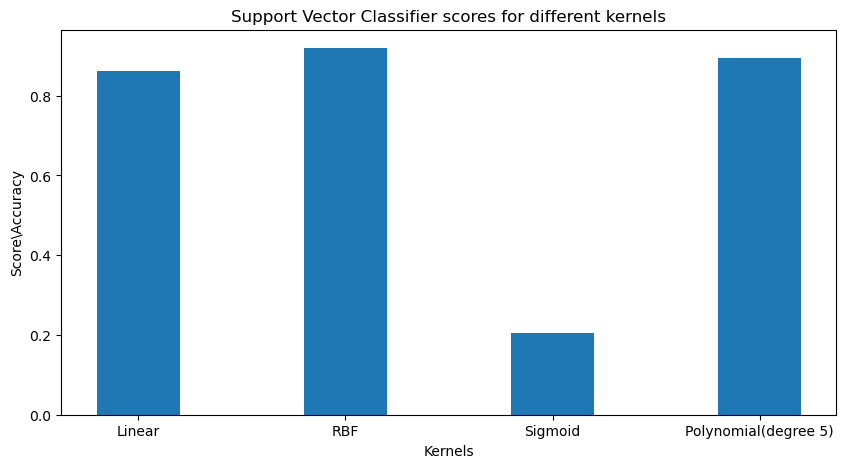

In [31]:
data={"Linear":0.8614,"RBF":0.9195,"Sigmoid":0.2059,"Polynomial(degree 5)":0.8955}
Kernels = list(data.keys())
Scores = list(data.values())
fig = plt.figure(figsize = (10, 5))

plt.bar(Kernels, Scores ,width = 0.4)
 
plt.xlabel("Kernels")
plt.ylabel("Score\Accuracy")
plt.title("Support Vector Classifier scores for different kernels")
plt.show()